In [1]:
import lib.setup as setup
# Please fill in the blanks blow with correct path on your computer

# Fiji.app
# Example: /home/usr/Fiji.app
ij_dir = '/home/loci/code/Fiji.app'

# Conda Enviroment
# Example : /home/usr/anaconda3/envs/yourenvs/
Conda_env = '/home/loci/anaconda3/envs/cp-notebooks'
setup.setenv('CONDA_PREFIX', Conda_env)

# Java_Home
# Example: /home/usr/anaconda3/envs/yourenvs/
Java_Home = '/home/loci/anaconda3/envs/cp-notebooks'
setup.setenv('JAVA_HOME', Java_Home)

# If you are using Java 9, to solve the jre reconstruct problem
# Please make a simlink of jre folder in your java path
# Example: type "sudo ln -s . jre" into terminal at your java path

setup.quiet_init(ij_dir)

Conda environment: /home/loci/anaconda3/envs/cp-notebooks
PYJNIUS_JAR: /home/loci/anaconda3/envs/cp-notebooks/share/pyjnius/pyjnius.jar
Java environment: /home/loci/anaconda3/envs/cp-notebooks
Added 261 JARs to the Java classpath.


In [2]:
import imglyb
from jnius import autoclass

Using python < 3. Upgrade to python 3 recommended


In [3]:
# Define an image display function.
from matplotlib import pyplot as plt
def show(image):
    plt.imshow(image, interpolation='nearest')
    plt.show()

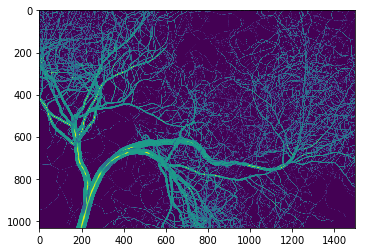

In [4]:
from skimage import io
# NB: Blood vessel image from: https://www.fi.edu/heart/blood-vessels
img = io.imread('https://www.fi.edu/sites/default/files/General_EduRes_Heart_BloodVessels_0.jpg')
import numpy as np
img = np.mean(img, axis=2)
show(img)

In [5]:
# Spin up the ImageJ context.
ImageJ = autoclass('net.imagej.ImageJ')
ij = ImageJ()

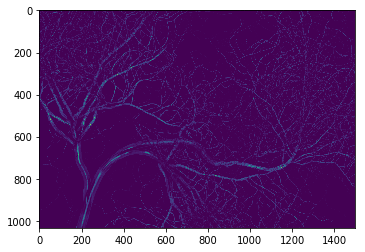

In [6]:
# Invoke the Frangi vesselness op.
vessels = np.zeros(img.shape, dtype=img.dtype)
ij.op().filter().frangiVesselness(imglyb.to_imglib(vessels), imglyb.to_imglib(img), [1, 1], 20)
show(vessels)

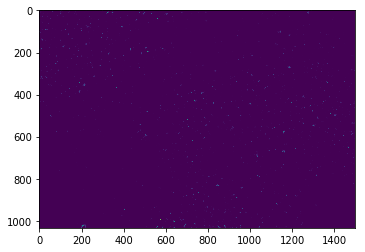

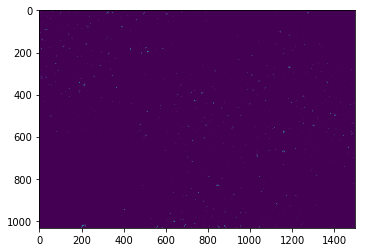

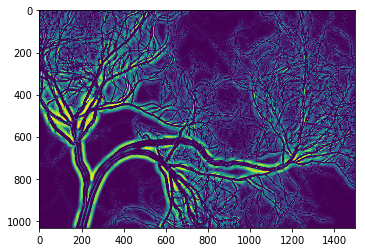

In [7]:
# How does scikit-image's Frangi vesselness implementation look?
from skimage.filters import frangi
show(frangi(img, black_ridges=False))
show(frangi(img, scale_range=[5, 10], black_ridges=False))
show(frangi(img))